In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [109]:
core_df = pd.read_csv('.\Data_Collection\score_college_exam_data\score_college_exam_data.csv', index_col= "Unnamed: 0")
core_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


In [113]:
core_df[(core_df['Year'] == 2019)].shape

(811851, 11)

In [110]:
core_df[(core_df['Year'] == 2020)].shape

(870486, 11)

In [119]:
core_df[(core_df['Year'] == 2021)].sort_values('sbd')

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
80,2021,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.00,8.75
68,2021,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.50,8.25
77,2021,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.50,8.75
42,2021,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.50,7.50
41,2021,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.50,8.25
...,...,...,...,...,...,...,...,...,...,...,...
995377,2021,64006584,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00
995346,2021,64006585,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50
995370,2021,64006586,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00
995339,2021,64006587,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75


In [118]:
core_df[(core_df['Year'] == 2022)].sort_values('sbd')

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2022,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.00,8.75
1,2022,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.50,8.25
2,2022,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.50,8.75
3,2022,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.50,7.50
4,2022,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.50,8.25
...,...,...,...,...,...,...,...,...,...,...,...
995436,2022,64006584,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00
995437,2022,64006585,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50
995438,2022,64006586,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00
995439,2022,64006587,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75


# Câu hỏi: Phân tích tỉ lệ đậu tốt nghiệp của các tỉnh trên cả nước (chỉ dựa trên điểm thi THPT)

Hiện nay, có rất nhiều ý kiến về việc bỏ kì thi THPT để tránh trình trạng mưa điểm '10', 30 điểm vẫn trượt đại học,... việc xét tuyển tốt nghiệp cho học sinh sẽ do nhà trường đánh giá. Các trường đại học nên tổ chức một kỳ thi riêng để tiếp cận những thí sinh có nguyện vọng đăng ký. Không ít ý kiến cho rằng kỳ thi mang tầm quốc gia chỉ còn tính hình thức vì tỉ lệ đậu tốt nghiệp năm nào cũng cao ngất ngưởng.

Để tìm ra giải pháp cho các ý kiến trên, ta nên thống kê xem tỉ lệ đậu tốt nghiệp THPT 2 năm gần đây (2021-2022) như thế nào với điểm chỉ của kì thi tốt nghiệp THPT? Nó có tác động nào đến tỉ lệ tốt nghiệp không (Nếu tỉ lệ gần như quá cao thì có vẻ kì thi này không có tác động mấy đến việc xét tốt nghiệp nhỉ???). Ở các tỉnh thì điều kiện học tập khác nhau nên tỉ lệ tốt nghiệp cũng sẽ khác nhau. Do đó để có thể điều chỉnh kì thi cho phù hợp thì ta nên thống kê tỉ lệ đậu tốt nghiệp qua từng tỉnh.

Điểm đủ điều kiện tốt nghiệp với:
- Chương trình chính quy là tổng trung bình cộng 4 bài thi (Toán, Văn, Anh và 1 tổ hợp bài thi tự chọn) lớn hơn hoặc bằng 5 (ở đây để có cái nhìn chủ yếu tập chung vào bài thi THPT nên mình sẽ không xét điểm cộng ưu tiên).
- Chương trình chính quy là tổng trung bình cộng 3 bài thi (Toán, Văn và 1 tổ hợp bài thi tự chọn) lớn hơn hoặc bằng 5 (ở đây để có cái nhìn chủ yếu tập chung vào bài thi THPT nên mình sẽ không xét điểm cộng ưu tiên).


Đọc mã tỉnh và tên tỉnh lưu vào `Matinh`

In [85]:
f = open('.\PhanTichVaTloiCauHoi\Matinh.txt', "r", encoding="utf-8")
f = f.read()
f = f.replace('\n','')
f = f.replace('– T',' - T')
f = f.split("Mã tỉnh: ")
Matinh = {}
f.remove('')
for i in f:
    i = i.split(" - ")
    Matinh[int(i[0].replace(' ',''))] = i[1]

In [89]:
def TotNghiepTheoNam(Year):
    core_df_year = core_df[(core_df['Year'] == Year)]
    core_df_year_CQ = core_df_year.dropna(thresh=8)
    core_df_year_GDTX = core_df_year[(np.isnan(core_df_year['Ngoai_ngu']))].drop('Ngoai_ngu', axis= 1)
    core_df_year_GDTX = core_df_year_GDTX.dropna(thresh=7)
    TileDauTotNghiep = {}
    for i in Matinh.keys():
        TileDauTotNghiep[Matinh[i]] = len(core_df_year_CQ[((((core_df_year_CQ["Toan"] + core_df_year_CQ["Van"] + core_df_year_CQ["Ngoai_ngu"] + 
                                        (core_df_year_CQ["Li"] + core_df_year_CQ["Hoa"] + core_df_year_CQ["Sinh"])/3)/4) >=5) 
                                        & (int(i) == core_df_year_CQ["sbd"] // 1000000))])

        TileDauTotNghiep[Matinh[i]] += len(core_df_year_CQ[(((core_df_year_CQ["Toan"] + core_df_year_CQ["Van"] + core_df_year_CQ["Ngoai_ngu"] + 
                                        (core_df_year_CQ["Dia"] + core_df_year_CQ["Su"] + core_df_year_CQ["GDCD"])/3)/4) >=5) 
                                        & (int(i) == core_df_year_CQ["sbd"] // 1000000)])

        TileDauTotNghiep[Matinh[i]] += len(core_df_year_GDTX[((((core_df_year_GDTX["Toan"] + core_df_year_GDTX["Van"] + 
                                        (core_df_year_GDTX["Li"] + core_df_year_GDTX["Hoa"] + core_df_year_GDTX["Sinh"])/3)/3) >=5) 
                                        & (int(i) == core_df_year_GDTX["sbd"] // 1000000))])

        TileDauTotNghiep[Matinh[i]] += len(core_df_year_GDTX[((((core_df_year_GDTX["Toan"] + core_df_year_GDTX["Van"] + 
                                        (core_df_year_GDTX["Dia"] + core_df_year_GDTX["Su"] + core_df_year_GDTX["GDCD"])/3)/3) >=5) 
                                        & (int(i) == core_df_year_GDTX["sbd"] // 1000000))])
        if (TileDauTotNghiep[Matinh[i]]!=0):
            TileDauTotNghiep[Matinh[i]] /= len(core_df_year_CQ[(int(i) == core_df_year_CQ["sbd"] // 1000000)])+len(core_df_year_GDTX[(int(i) == core_df_year_GDTX["sbd"] // 1000000)])
    return TileDauTotNghiep
TotNghiepTheoNam(2022)

{'THÀNH PHỐ HÀ NỘI': 0.9090909090909091,
 'THÀNH PHỐ HỒ CHÍ MINH': 0.9471207381091257,
 'THÀNH PHỐ HẢI PHÒNG': 0.9642185514612452,
 'THÀNH PHỐ ĐÀ NẴNG': 0.8735476898135639,
 'TỈNH HÀ GIANG': 0.4669902912621359,
 'TỈNH CAO BẰNG': 0.6374435732953195,
 'TỈNH LAI CHÂU': 0.7184435305283138,
 'TỈNH LÀO CAI': 0.8753168567807351,
 'TỈNH TUYÊN QUANG': 0.8473104342190538,
 'TỈNH LẠNG SƠN': 0.7677080527875033,
 'TỈNH BẮC KẠN': 0.7698541329011345,
 'TỈNH THÁI NGUYÊN': 0.8378532919457605,
 'TỈNH YÊN BÁI': 0.8057794676806084,
 'TỈNH SƠN LA': 0.689010873007495,
 'TỈNH PHÚ THỌ': 0.9407699901283317,
 'TỈNH VĨNH PHÚC': 0.993996901626646,
 'TỈNH QUẢNG NINH': 0.8271331328162103,
 'TỈNH BẮC GIANG': 0.9209483863451008,
 'TỈNH BẮC NINH': 0.9449704142011834,
 'TỈNH HẢI DƯƠNG': 0.9327905871167103,
 'TỈNH HƯNG YÊN': 0.8844194153928667,
 'TỈNH HÒA BÌNH': 0.794099939795304,
 'TỈNH HÀ NAM': 0.9711901968452614,
 'TỈNH NAM ĐỊNH': 0.9842175761458273,
 'TỈNH THÁI BÌNH': 0.9224819725517562,
 'TỈNH NINH BÌNH': 0.9780083

<AxesSubplot: >

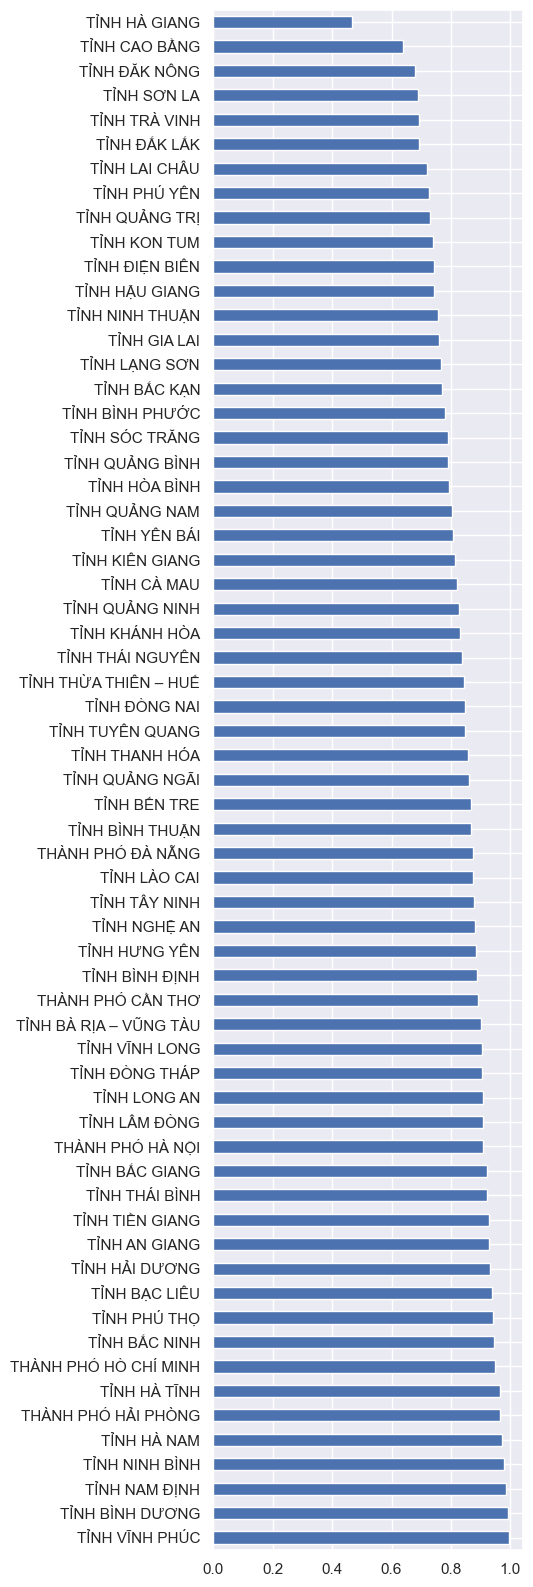

In [99]:
dic = TotNghiepTheoNam(2021)
dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
dic = {k: v for k, v in dic}
data = pd.Series(dic)
data.plot.barh(rot=0,figsize = (4,20))

<AxesSubplot: >

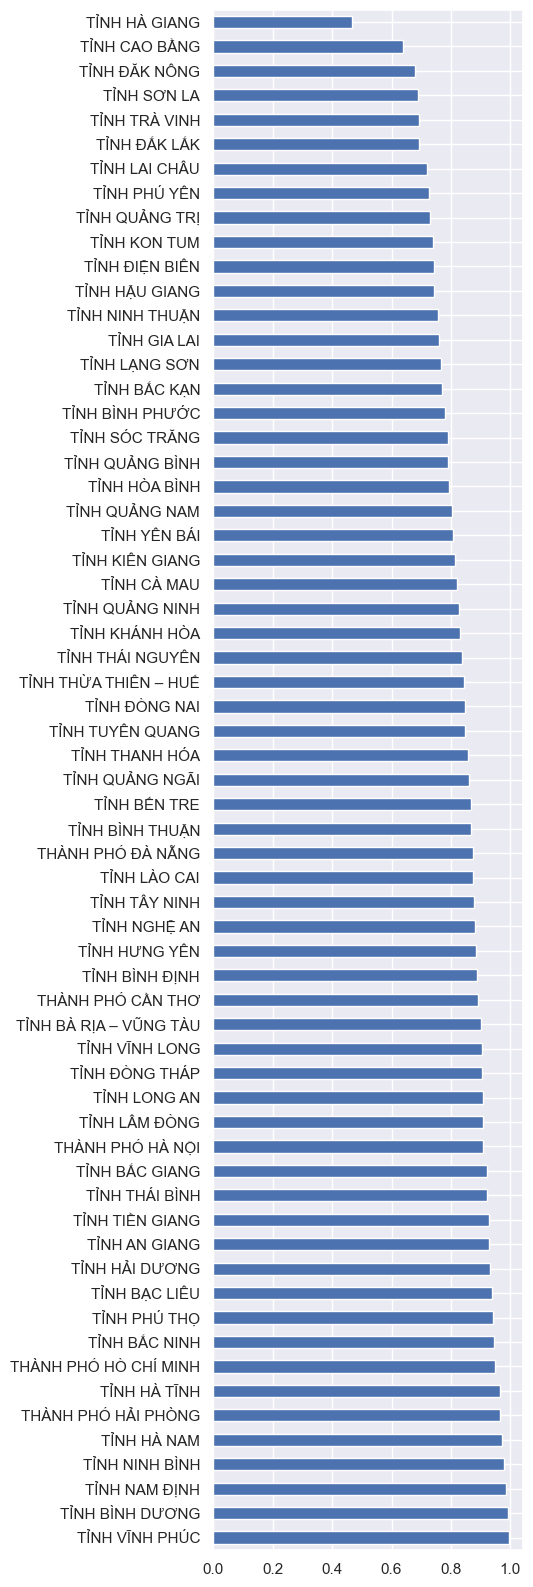

In [100]:
dic = TotNghiepTheoNam(2022)
dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
dic = {k: v for k, v in dic}
data = pd.Series(dic)
data.plot.barh(rot=0,figsize = (4,20))